In [9]:
import numpy,pandas,scipy.io,scipy.sparse
import scrublet
#
#
input_dir = 'cellranger_output_for_healthy_controls/'
counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
genes = numpy.array(scrublet.load_genes(input_dir + '/features.tsv', delimiter='\t', column=1))
out_df = pandas.read_csv(input_dir + '/barcodes.tsv', header = None, index_col=None, names=['barcode'])
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))
#

Counts matrix shape: 66457 rows, 33538 columns
Number of genes in gene list: 33538


In [10]:
scrub = scrublet.Scrublet(counts_matrix, expected_doublet_rate=0.06)

In [11]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, min_cells=3, min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 47.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.6%
Elapsed time: 236.5 seconds


Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 51.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.3%


(<Figure size 576x216 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b45c62c2240>,
       dtype=object))

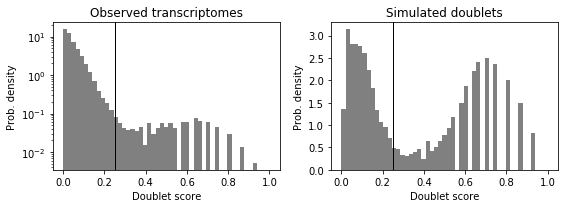

In [12]:
import matplotlib.pyplot as plt
scrub.call_doublets(threshold=0.25)
scrub.plot_histogram()

In [13]:
print(scrub.detected_doublet_rate_)
out_df['doublet_scores'] = doublet_scores
out_df['predicted_doublets'] = predicted_doublets
out_df.to_csv('healthy_controls_doublets.txt', index=False,header=True)

0.021908903501512256


Counts matrix shape: 18752 rows, 33538 columns
Number of genes in gene list: 33538
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 18.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.3%
Elapsed time: 27.7 seconds
Detected doublet rate = 3.7%
Estimated detectable doublet fraction = 44.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.4%
0.037116040955631396


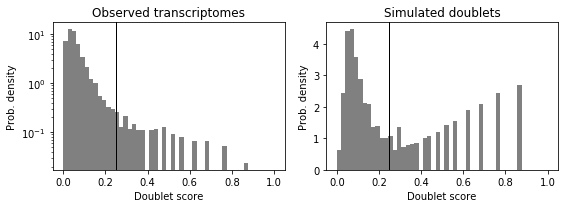

In [14]:
input_dir = 'cellranger_output_for_COVID19_patients/'
counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
genes = numpy.array(scrublet.load_genes(input_dir + '/features.tsv', delimiter='\t', column=1))
out_df = pandas.read_csv(input_dir + '/barcodes.tsv', header = None, index_col=None, names=['barcode'])
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))
scrub = scrublet.Scrublet(counts_matrix, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, min_cells=3, min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
scrub.call_doublets(threshold=0.25)
scrub.plot_histogram()
print(scrub.detected_doublet_rate_)
out_df['doublet_scores'] = doublet_scores
out_df['predicted_doublets'] = predicted_doublets
out_df.to_csv('COVID19_patients_doublets.txt', index=False,header=True)